In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sheets_dict = pd.read_excel('E8_topic_A__Students_characteristics.xlsx',sheet_name=None)
gender_df = sheets_dict['sex_s']

stats_dict = pd.read_excel('P_Data_Extract_From_World_Development_Indicators.xlsx',sheet_name = None)
stats_df_old = stats_dict['Data']

In [3]:
#rename weird columns
gender_df.rename(columns={gender_df.columns[3]:'Unnamed: 3'},inplace=True)

#drop useless columns (useless for our research)
drop_rows = ['Educational origin ','Location previous degree ','Mental well-being ',
             'Having studied abroad during BA studies ',
             'Having studied abroad during MA studies ',
             'Temporary enrolment abroad ',
             'Pre-covid student ',
             'Online vs. in person teaching ',
             'Sex (incl. prefer not to assign to any category offered) ',
             "Sex (incl. 'other')  ",
             'ETER: Right to award PhD ',
             'ETER: Total academic personnel (FTE) ',
             'ETER: Number of students by academic staff (FTE) ',
             'ETER: Number of master students by all students ',
             'ETER: Concentration of subjects ',
             'ETER: Number of PhD divided by all students ',
             'ETER: Relative specialisation in STEM ',
             'Experience abroad ',
             'Relationship job and studies ',
             'Transition into Master programme ',
             'Sex ',
             'Impairments limiting in studies ' ]

for i in range (0,len(drop_rows)):
    gender_df = gender_df[gender_df['Unnamed: 3']!=drop_rows[i]]

#delete empty rows and columns
gender_df = gender_df.iloc[2:].reset_index(drop=True)
gender_df = gender_df.dropna(axis=1,how='all')
gender_df = gender_df.dropna(axis=0,how='all')

#add row for later column names
gender_df['column_names']=gender_df.apply(lambda row: f"{row['Unnamed: 3']}, {row['Unnamed: 5']}, {row['Unnamed: 9']}",axis=1).astype('string')

#turn df
gender_df = gender_df.T.reset_index(drop=True)

#rename columns
for i in range (0,len(gender_df.columns)):
    gender_df.rename(columns={gender_df.columns[i]:gender_df.iloc[34,i]},inplace=True)
    
#delete useless rows and columns
gender_df = gender_df.drop(34).reset_index(drop=True) #last row
gender_df = gender_df.iloc[9:].reset_index(drop=True) #first 8 rows
gender_df = gender_df.drop(['nan, nan, nan'], axis=1).reset_index(drop=True)

#rename first column
gender_df.rename(columns={gender_df.columns[0]:'country'},inplace=True)

#handle missing data
gender_df.replace('t.f.c.', np.nan, inplace = True)

#change all datatypes if column has numeric values
for col in gender_df.columns:
    if pd.to_numeric(gender_df[col], errors='coerce').notna().all():
        gender_df[col] = gender_df[col].astype(float)

#merge female, other, prefer not to assign together to FLINTA
new_columns_order = ['country'] #dictionary with new column names
for col in gender_df.columns.tolist():
    if col.endswith(', Female') or col.endswith(', Other') or col.endswith(', Prefer not to assign myself to the categories offered'):
        if col.endswith(', Other') or col.endswith(', Prefer not to assign myself to the categories offered'):
            gender_df[col] = gender_df[col].apply(lambda x: 0 if pd.isna(x) else x)
        base_name = col.rsplit(', ', 1)[0] #splits column name
        new_col = f"{base_name}, FLINTA*" #new name for column
        if new_col not in new_columns_order:
            gender_df[new_col] = gender_df[col] #create new column
            new_columns_order.append(new_col)
        else:
            gender_df[new_col] += gender_df[col] #add other percentages to column
        gender_df.drop([col],axis=1,inplace=True)
    elif col.endswith(', Male'):
        new_columns_order.append(col) #copy every 'male' column
gender_df = gender_df.reindex(columns=new_columns_order) #reordering columns


/tmp/ipykernel_32/1295173764.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gender_df[new_col] = gender_df[col] #create new column
/tmp/ipykernel_32/1295173764.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gender_df[new_col] = gender_df[col] #create new column
/tmp/ipykernel_32/1295173764.py:69: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get 

In [3]:
#add stats statistics df

#delete useless columns
stats_df_old.drop(['Series Name','Series Code','Country Name'], axis=1, inplace=True)

#delete empty rows
stats_df_old.dropna(axis=0,how='all',inplace=True)

#split df into gdp and unemployment dfs
gdp_df = stats_df_old.iloc[:25].reset_index(drop=True)
gdp_df.rename({'2023 [YR2023]':'GDP per capita($)'}, axis=1, inplace=True)
unemp_df = stats_df_old.iloc[25:].reset_index(drop=True)
unemp_df.rename({'2023 [YR2023]':'Unemployment(%)'}, axis=1, inplace=True)

#merge columns of two dfs back together
stats_df = pd.merge(gdp_df,unemp_df, on='Country Code', how='outer')

#rename country codes to fit to other gender_df
countries_list = ['AT', 'AZ', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GE', 'HR',
       'HU', 'CH', 'IE', 'IS', 'LT', 'LV', 'MT', 'NL', 'NO', 'PL', 'PT',
       'RO', 'SE', 'SK']
stats_df['country']=countries_list
stats_df.drop(['Country Code'],axis=1,inplace=True)

In [4]:
#merge gender_df and stats_df together
gender_df = pd.merge(gender_df, stats_df, on='country',how='outer')

In [6]:
gender_df.to_excel('gender_data.xlsx',index=False)
from IPython.display import FileLink
FileLink('gender_data.xlsx')

/home/jovyan/Untitled Folder/gender_data.xlsx

In [11]:
gender_df.columns[0:200].to_list()

['country',
 'All students , All students, FLINTA*',
 'All students , All students, Male',
 'Age group , < 22 years, FLINTA*',
 'Age group , < 22 years, Male',
 'Age group , 22 - 24 years, FLINTA*',
 'Age group , 22 - 24 years, Male',
 'Age group , 25 - 29 years, FLINTA*',
 'Age group , 25 - 29 years, Male',
 'Age group , 30 years and older, FLINTA*',
 'Age group , 30 years and older, Male',
 'Educational background , Low education background (ISCED 0-2), FLINTA*',
 'Educational background , Low education background (ISCED 0-2), Male',
 'Educational background , Medium education background (ISCED 3-4), FLINTA*',
 'Educational background , Medium education background (ISCED 3-4), Male',
 'Educational background , Short-cycle tertiary education background (ISCED 5), FLINTA*',
 'Educational background , Short-cycle tertiary education background (ISCED 5), Male',
 'Educational background , Tertiary education background (ISCED 6-8), FLINTA*',
 'Educational background , Tertiary education ba

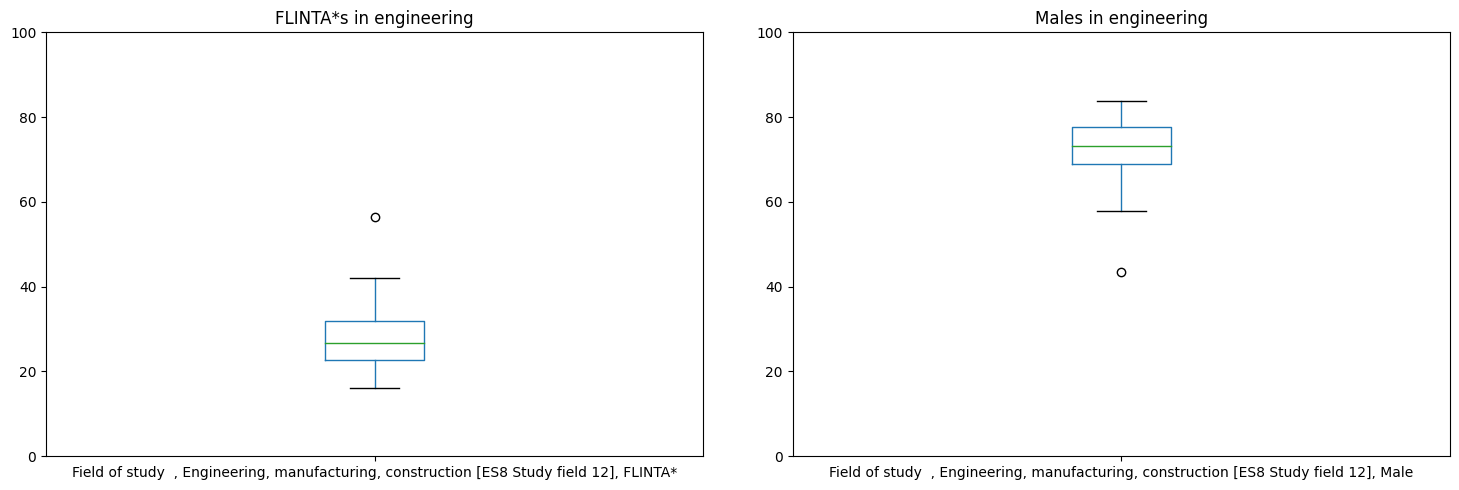

In [19]:
#boxplot definition
def comparableBoxplots(column1, title1, column2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    gender_df.boxplot(column=column1, ax=axes[0], grid=False)
    axes[0].set_title(title1)
    axes[0].set_ylim(0, 100)


    gender_df.boxplot(column= column2, ax=axes[1], grid=False)
    axes[1].set_title(title2)
    axes[1].set_ylim(0, 100)

    # Show the plots
    plt.tight_layout()
    plt.show()
    
comparableBoxplots('Field of study  , Engineering, manufacturing, construction [ES8 Study field 12], FLINTA*', 'FLINTA*s in engineering', 'Field of study  , Engineering, manufacturing, construction [ES8 Study field 12], Male', 'Males in engineering')

In [32]:
#SORRY THORBEN, I SOMEHOW BROKE YOUR CODE HAHA
value = gender_df[(gender_df['Severity of impairment , severely limited in studies, FLINTA*'] < 50)]
print(value[['country', 'Severity of impairment , severely limited in studies, FLINTA*' ]])

Empty DataFrame
Columns: [country, Severity of impairment , severely limited in studies, FLINTA*]
Index: []


In [34]:
# Finding outlier countries in a column
def find_outliers(column_name):
    Q1 = gender_df[column_name].quantile(0.25)
    Q3 = gender_df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = gender_df[(gender_df[column_name] < lower_bound) | (gender_df[column_name] > upper_bound)]

    print(outliers[["country", column_name]])
find_outliers('Field of study  , Humanities [ES8 Study field 4], Male')

   country  Field of study  , Humanities [ES8 Study field 4], Male
22      RO                                          69.580076     
24      SK                                          62.546445     
